In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
digit = keras.datasets.mnist
(X_train,y_train),( X_test, y_test) = digit.load_data()

In [3]:
class_name = ['0','1','2','3','4','5','6','7','8','9']

In [4]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

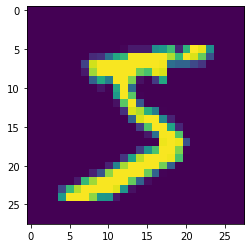

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
X_valid = X_train[:6000]
X_train = X_train[6000:]

In [10]:
y_valid = y_train[:6000]
y_train = y_train[6000:]

In [11]:
np.random.seed(45)
tf.random.set_seed(45)

In [12]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
model_history=model.fit(X_train,y_train,
                        epochs=5,
                        validation_data=(X_valid,y_valid))

Epoch 1/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4821 - accuracy: 0.8647 - val_loss: 0.1211 - val_accuracy: 0.9638
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1120 - accuracy: 0.9655 - val_loss: 0.1032 - val_accuracy: 0.9703
Epoch 3/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0719 - accuracy: 0.9770 - val_loss: 0.1013 - val_accuracy: 0.9708
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9840 - val_loss: 0.0984 - val_accuracy: 0.9717
Epoch 5/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0981 - val_accuracy: 0.9723


In [16]:
model.save('Model/model.h5')

In [17]:
model = keras.models.load_model('Model/model.h5')

In [18]:
model_history.params

{'verbose': 1, 'epochs': 5, 'steps': 1688}

In [19]:
model_history.history

{'loss': [0.2693294584751129,
  0.1089465543627739,
  0.07416694611310959,
  0.05396463721990585,
  0.03986683860421181],
 'accuracy': [0.9217036962509155,
  0.9657222032546997,
  0.9767037034034729,
  0.9821481704711914,
  0.9872221946716309],
 'val_loss': [0.12113403528928757,
  0.10315103828907013,
  0.10125688463449478,
  0.0984170213341713,
  0.098148874938488],
 'val_accuracy': [0.9638333320617676,
  0.9703333377838135,
  0.9708333611488342,
  0.971666693687439,
  0.9723333120346069]}

[]

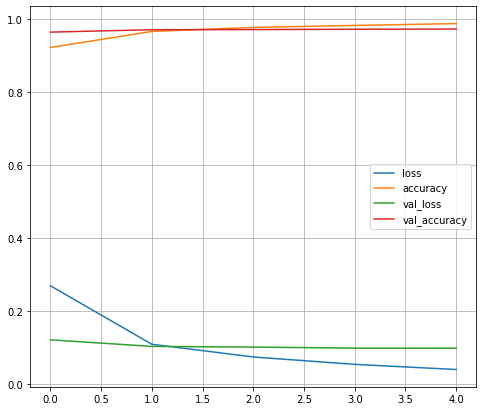

In [20]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,7))
plt.grid()
plt.plot()

In [21]:
model.evaluate(X_test,y_test, verbose=1)

313/313 [==============================] - 0s 763us/step - loss: 0.0971 - accuracy: 0.9731


[0.09710973501205444, 0.9731000065803528]

In [22]:
X_new=X_test[:5]

In [23]:
Y_prob=model.predict(X_new)

In [24]:
Y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(54,36;334.8x217.44)


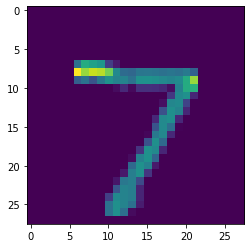

In [25]:
print(plt.imshow(X_new[0]))

AxesImage(54,36;334.8x217.44)


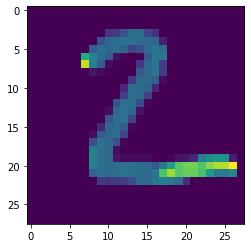

In [26]:
print(plt.imshow(X_new[1]))

AxesImage(54,36;334.8x217.44)


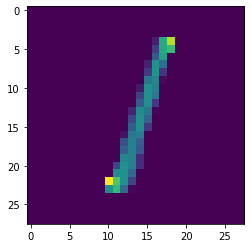

In [27]:
print(plt.imshow(X_new[2]))

AxesImage(54,36;334.8x217.44)


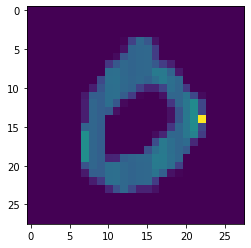

In [28]:
print(plt.imshow(X_new[3]))

AxesImage(54,36;334.8x217.44)


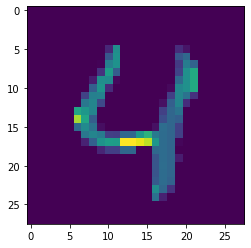

In [29]:
print(plt.imshow(X_new[4]))

In [31]:
Y_classes = Y_prob.argmax(axis = -1)
Y_classes

array([7, 2, 1, 0, 4])